In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

In [2]:
import networkx as nx
import numpy as np

def kwl_test(graph, k):
    # Initialize node labels with their IDs
    node_labels = {node: [node] for node in graph.nodes()}

    for _ in range(k):
        new_labels = {}
        for node in graph.nodes():
            neighbors = list(graph.neighbors(node))
            neighbor_labels = [node_labels[n] for n in neighbors]
            combined_labels = np.concatenate(neighbor_labels + [node_labels[node]])
            unique_labels, label_counts = np.unique(combined_labels, return_counts=True)
            sorted_labels = [label for _, label in sorted(zip(label_counts, unique_labels), reverse=True)]
            new_labels[node] = sorted_labels

        node_labels = new_labels

    return node_labels

def group_nodes_by_color(node_labels):
    color_to_nodes = {}
    for node, labels in node_labels.items():
        color = tuple(labels)
        if color not in color_to_nodes:
            color_to_nodes[color] = []
        color_to_nodes[color].append(node)
    
    return list(color_to_nodes.values())




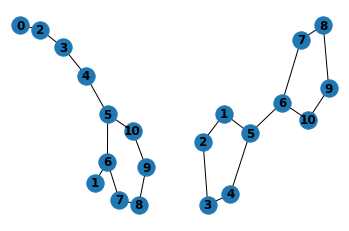

In [20]:
# Example graph using NetworkX
alpha = nx.Graph()
beta = nx.Graph()

alpha.add_edges_from([(0, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (6, 7), (7, 8), (8, 9), (9, 10), (10, 5)])
beta.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 6)])
subax1 = plt.subplot(121)
nx.draw(alpha, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw(beta, with_labels=True, font_weight='bold')


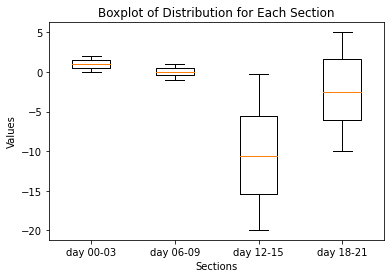

In [3]:
data = np.concatenate([
    np.random.uniform(0, 2, 250),
    np.random.uniform(-1, 1, 250),
    np.random.uniform(-20, 0, 250),
    np.random.uniform(-10, 5, 250)
])

# Create a list to group the data based on the sections
sections = ["day 00-03", "day 06-09", "day 12-15", "day 18-21"]
grouped_data = [data[:250], data[250:500], data[500:750], data[750:]]

# Create a boxplot for each section
plt.boxplot(grouped_data, labels=sections)
plt.title('Boxplot of Distribution for Each Section')
plt.xlabel('Sections')
plt.ylabel('Values')
plt.show()

In [16]:
def k_weisfeiler_lehman(adj_matrix, k):
    num_nodes = len(adj_matrix)
    labels = [{i: 0} for i in range(num_nodes)]
    all_groups = []

    for _ in range(k):
        new_labels = [label.copy() for label in labels]
        iteration_groups = {}
        
        for i in range(num_nodes):
            neighbors = [j for j in range(num_nodes) if adj_matrix[i][j] == 1]
            neighbor_labels = tuple(sorted([labels[j][j] for j in neighbors]))
            new_labels[i][i] = hash(neighbor_labels)
            
            label_str = str(new_labels[i])
            if label_str not in iteration_groups:
                iteration_groups[label_str] = []
            iteration_groups[label_str].append(i)
        
        labels = new_labels
        all_groups.append(list(iteration_groups.values()))

    return all_groups

# Example adjacency matrix (replace with your graph's adjacency matrix)
adjacency_matrix = [
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
]

k_iterations = 3
iteration_groups = k_weisfeiler_lehman(adjacency_matrix, k_iterations)

for i, groups in enumerate(iteration_groups):
    print(f"Iteration {i + 1} Groups:", groups)


Iteration 1 Groups: [[0], [1], [2], [3]]
Iteration 2 Groups: [[0], [1], [2], [3]]
Iteration 3 Groups: [[0], [1], [2], [3]]


In [21]:
import networkx as nx

def k_weisfeiler_lehman(graph, k):
    num_nodes = graph.number_of_nodes()
    labels = [{i: 0} for i in range(num_nodes)]
    all_groups = []

    for _ in range(k):
        new_labels = [label.copy() for label in labels]
        iteration_groups = {}
        
        for i in range(num_nodes):
            neighbors = list(graph.neighbors(i))
            neighbor_labels = tuple(sorted([labels[j][j] for j in neighbors]))
            new_labels[i][i] = hash(neighbor_labels)
            
            label_str = str(new_labels[i])
            if label_str not in iteration_groups:
                iteration_groups[label_str] = []
            iteration_groups[label_str].append(i)
        
        labels = new_labels
        all_groups.append(list(iteration_groups.values()))

    return all_groups

# Create a NetworkX graph (replace this with your graph creation logic)





In [24]:
k_iterations = 2
iteration_groups = k_weisfeiler_lehman(alpha, k_iterations)

for i, groups in enumerate(iteration_groups):
    print(f"Iteration {i + 1} Groups:", groups)

Iteration 1 Groups: [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
Iteration 2 Groups: [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]


In [8]:
def signed_angle(v1, v2):
    norm_cross = np.linalg.norm(np.cross(v1, v2))
    dot_product = np.dot(v1, v2)
    
    angle = np.arctan2(norm_cross, dot_product)
    return angle

v1 = np.array([1, 0, 0])
v2 = np.array([1, 1, 0])

angle = signed_angle(v2, v1)
print("Signed Angle:", angle)

Signed Angle: 0.7853981633974483


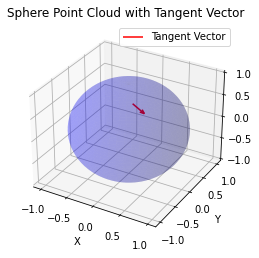

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_sphere_points(num_points):
    phi = np.linspace(0, np.pi, num_points)
    theta = np.linspace(0, 2 * np.pi, num_points)
    phi, theta = np.meshgrid(phi, theta)
    
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    
    return x, y, z

def plot_sphere(ax, x, y, z):
    ax.plot_surface(x, y, z, color='b', alpha=0.2)

def plot_tangent_vector(ax, point, tangent):
    ax.quiver(*point, *tangent, color='r', label='Tangent Vector')

# Parameters
num_points = 1000
tangent_point = np.array([0.3, -0.4, 0.9])
tangent_vector = np.array([0.1, 0.2, -0.3])

# Generate sphere points
x, y, z = generate_sphere_points(num_points)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the sphere
plot_sphere(ax, x, y, z)

# Plot the tangent vector
plot_tangent_vector(ax, tangent_point, tangent_vector)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sphere Point Cloud with Tangent Vector')

plt.legend()
plt.show()


In [3]:
for i in np.arange(1, 5):
        for j in np.arange(i+1, 5):
            print(0, i, j)
            

0 1 2
0 1 3
0 1 4
0 2 3
0 2 4
0 3 4


In [2]:
import numpy as np

M = np.array([[1.0], [2.0], [3.0], [4.0], [5.0]])  # Example matrix of size n by 1
a = 2.0  # Lower bound
b = 4.0  # Upper bound

# Clip the values in M to be within the range [a, b]
M_clipped = np.clip(M, a, b)

# Print the original and clipped matrices
print("Original Matrix M:")
print(M)

print("\nClipped Matrix M:")
print(M_clipped)

Original Matrix M:
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]

Clipped Matrix M:
[[2.]
 [2.]
 [3.]
 [4.]
 [4.]]


In [2]:
a = np.array([1, 2, 3])
b = np.array([2, 6, 12])
b/a

array([2., 3., 4.])

In [4]:
a = torch.rand(1, 2)

b = 2 * torch.pi * torch.rand(1, 2)

x = 3

real = a * torch.cos(b)
imag = a * torch.sin(b)
frac = (torch.complex(real, - imag) / a) * (x - torch.complex(real, imag))/ (1 - torch.complex(real, - imag) * x)

In [5]:
frac

tensor([[-1.1139+0.0214j, -1.4111+0.2346j]])

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the sphere metric tensor (identity matrix in this case)
def metric_tensor(theta, phi):
    return torch.eye(2)

# Define the geodesic path length as a custom loss function
def geodesic_length_loss(theta_phi_pred, theta_phi_target):
    g = metric_tensor(theta_phi_pred[0], theta_phi_pred[1])
    ds = torch.sqrt(torch.sum((theta_phi_pred - theta_phi_target) ** 2))
    return ds

# Define a simple neural network for predicting theta and phi
class GeodesicNetwork(nn.Module):
    def __init__(self):
        super(GeodesicNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.fc(x)

# Generate random initial and final points on the sphere
initial_point = torch.randn(2)
initial_point /= torch.norm(initial_point)
final_point = torch.randn(2)
final_point /= torch.norm(final_point)

# Create the neural network and optimizer
net = GeodesicNetwork()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Training loop to minimize geodesic path length
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    theta_phi_pred = net(initial_point)
    loss = geodesic_length_loss(theta_phi_pred, final_point)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Get the final predicted geodesic path
geodesic_path = net(initial_point)
print("Final Geodesic path:", geodesic_path)


Epoch [100/1000], Loss: 0.021648485213518143
Epoch [200/1000], Loss: 0.018672404810786247
Epoch [300/1000], Loss: 0.006766039412468672
Epoch [400/1000], Loss: 0.017003467306494713
Epoch [500/1000], Loss: 0.006667747627943754
Epoch [600/1000], Loss: 0.009237552061676979
Epoch [700/1000], Loss: 0.009365292266011238
Epoch [800/1000], Loss: 0.018769310787320137
Epoch [900/1000], Loss: 0.015591830015182495
Epoch [1000/1000], Loss: 0.002438852796331048
Final Geodesic path: tensor([-0.0039,  1.0063], grad_fn=<AddBackward0>)


In [8]:
import numpy as np
# Define the input vector
v = np.array([-3, -2, -1, 0, 1, 2, 5, 6, 7, 8, 9, 21, 22, 23, 55, 56, 57, 58, 59, 100, 101, 120, 121])

def select_longest_index_segments(input_vector, top_number = 3):
    segments = []
    current_segment = []

    # Iterate through the input vector
    for value in input_vector:
        if not current_segment or value == current_segment[-1] + 1:
            current_segment.append(value)
        else:
            segments.append(current_segment)
            current_segment = [value]

    # Append the last segment
    segments.append(current_segment)

    # Calculate the lengths of the segments
    segment_lengths = [len(segment) for segment in segments]

    # Sort the segments by length in descending order
    sorted_segments = sorted(zip(segments, segment_lengths), key=lambda x: x[1], reverse=True)

    # Select the top k longest segments
    top_k_segments = [segment for segment, length in sorted_segments[:top_number]]

    return top_k_segments

[[-3, -2, -1, 0, 1, 2], [5, 6, 7, 8, 9], [55, 56, 57, 58, 59]]

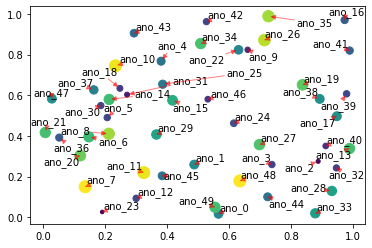

In [11]:
from adjustText import adjust_text
N = 50
scatter_data = np.random.rand(N, 3)
fig, ax = plt.subplots()
ax.scatter(scatter_data[:, 0], scatter_data[:, 1], c=scatter_data[:, 2], s=scatter_data[:, 2] * 150)
labels = ['ano_{}'.format(i) for i in range(N)]
texts = []
for x, y, text in zip(scatter_data[:, 0], scatter_data[:, 1], labels):
    texts.append(ax.text(x, y, text))
adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>",color='r', alpha=0.5))
plt.show()
              

In [12]:
from sklearn.decomposition import PCA

In [16]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.T)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [17]:
principalDf

,principal component 1,principal component 2
0,-1.0,0.0
1,1.0,0.0


In [18]:
principalComponents

array([[-1.,  0.],
       [ 1.,  0.]])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, solve, ParametricRegion, ParametricPlot, ParametricNDSolve, ImplicitRegion
from sympy.vector import CoordSys3D
from sympy.vector.vector import ParametricRegion3D
from sympy.calculus.util import function_range
from sympy.tensor.array import Array

# Define symbolic variables
u, v, a, t = symbols('u v a t')
R = 3  # Radius of the torus

# Define the torus parametric equations
N = CoordSys3D('N')
torus = Array([R * (1 + np.cos(v)) * np.cos(u), R * (1 + np.cos(v)) * np.sin(u), R * np.sin(v)], (u, v))

# Define the geodesic equation
geodesic = ParametricRegion3D(
    torus.subs({u: t, v: v_}),
    (v_, (0, 2 * np.pi))
)

# Solve for geodesic
sol = ParametricNDSolve([
    Eq(Derivative(Function('v')(u), u), a),
    Eq(Function('v')(0), v_0),
    Eq(Function('u')(0), u_0)
], [Function('v')(u), Function('u')(u)], (u, 0, 1), {a})

# Calculate geodesic points
v_expr = Function('v')(u)
u_expr = Function('u')(u)
geodesic_points = [(v_expr.subs(sol, t=t_).rhs, u_expr.subs(sol, t=t_).rhs) for t_ in np.linspace(0, 1, 100)]

# Extract coordinates
geodesic_coordinates = [torus.subs({u: u_, v: v_}) for v_, u_ in geodesic_points]

# Plot the torus
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Parametric plot of the torus
u_vals = np.linspace(0, 2 * np.pi, 100)
v_vals = np.linspace(0, 2 * np.pi, 100)
U, V = np.meshgrid(u_vals, v_vals)
X = (R + R * np.cos(V)) * np.cos(U)
Y = (R + R * np.cos(V)) * np.sin(U)
Z = R * np.sin(V)

ax.plot_surface(X, Y, Z, color='white')

# Parametric plot of the geodesic
geodesic_u = [point[0] for point in geodesic_coordinates]
geodesic_v = [point[1] for point in geodesic_coordinates]

ax.plot(geodesic_u, geodesic_v, np.zeros_like(geodesic_u), color='red')

plt.show()


ImportError: cannot import name 'ParametricRegion' from 'sympy' (/home/mila/y/yanlei.zhang/.conda/envs/sheafnn/lib/python3.10/site-packages/sympy/__init__.py)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, Eq, sqrt, ImplicitRegion, Region, random_point
from sympy.calculus.util import function_range
from sympy.geometry import Point3D, Sphere
from sympy.vector import CoordSys3D, ParametricRegion, ParametricRegion3D
from sympy.vector.vector import ImplicitRegion3D
from sympy.vector.point import Point

# Define symbolic variables
x, y, z, R, r = symbols('x y z R r')

# Define the implicit region
implicit_region = ImplicitRegion(
    (R - sqrt(x**2 + y**2))**2 + z**2 - r**2 <= 0, 
    (x, -4, 4), (y, -4, 4), (z, -4, 4)
)

# Discretize the region boundary
boundary_region = implicit_region.boundary
discretized_boundary = boundary_region.discretize(bounding_box=(-4, 4))

# Define the geodesic data
data = []

# Seed for randomization
np.random.seed(123)

# Generate a random point on the region boundary
random_point_on_boundary = random_point(discretized_boundary)

# Generate a random direction vector on the unit sphere
random_direction = Sphere(Point(0, 0, 0), 1).random_point()

# Create a geodesic trajectory
trajectory = []

# Initialize the point and direction
current_point = random_point_on_boundary
current_direction = random_direction
step_size = 0.01

for _ in range(1000):  # Run for a maximum of 1000 steps
    trajectory.append(current_point)
    # Update the point using the direction vector
    current_point += step_size * current_direction
    # Terminate if the point is outside the region
    if not boundary_region.contains(current_point):
        break

# Plot the region boundary and geodesic trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the region boundary
boundary_points = discretized_boundary.points
ax.scatter(boundary_points[:, 0], boundary_points[:, 1], boundary_points[:, 2], c='blue', marker='o', s=5)

# Plot the geodesic trajectory
trajectory_points = np.array([[point[0], point[1], point[2]] for point in trajectory])
ax.plot(trajectory_points[:, 0], trajectory_points[:, 1], trajectory_points[:, 2], color='red')

plt.show()


ImportError: cannot import name 'ImplicitRegion' from 'sympy' (/home/mila/y/yanlei.zhang/.conda/envs/sheafnn/lib/python3.10/site-packages/sympy/__init__.py)

In [6]:
a = np.array([[1,2], [3, 4]])
b = np.array([[0, 0], [0, 1]])

np.vstack([a, b], axis = 0)

TypeError: _vhstack_dispatcher() got an unexpected keyword argument 'axis'

In [8]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

def Midpoint_Search(S, pts, n):
    for _ in range(n):
        pts2 = [S(pt) for pt in pts]
        
        midpts = [(pts2[i] + pts2[i+1]) * 0.5 for i in range(len(pts2) - 1)]
        
        for i in range(len(midpts)):
            def distance_from_midpoint(p):
                return np.linalg.norm(S(p) - midpts[i])
            
            pts[i] = minimize(distance_from_midpoint, pts[i]).x

    return pts

# Define the torus surface function
def torus_func(r=1, R=4):
    r=r
    R=R
    def torus(p):
        u, v = p
        x = (R + r * np.cos(v)) * np.cos(u)
        y = (R + r * np.cos(v)) * np.sin(u)
        z = r * np.sin(v)
        return np.array([x, y, z])
    return torus

def torus_meshgrid(R=4, r=1, u_vals=None, v_vals=None):
    """Generate the torus meshgrid based on given R, r, u, and v values."""
    if u_vals is None:
        u_vals = np.linspace(0, 2*np.pi, 100)
    if v_vals is None:
        v_vals = np.linspace(0, 2*np.pi, 100)
    U, V = np.meshgrid(u_vals, v_vals)
    X = (R + r * np.cos(V)) * np.cos(U)
    Y = (R + r * np.cos(V)) * np.sin(U)
    Z = r * np.sin(V)
    return X, Y, Z

def plot_torus_with_points_fixed_v2(result_pts, R=4, r=1, alpha=0.3, u_vals=None, v_vals=None):
    X, Y, Z = torus_meshgrid(R, r, u_vals, v_vals)
    
    # Extract the refined points in R^3
    refined_X = [torus(pt)[0] for pt in result_pts]
    refined_Y = [torus(pt)[1] for pt in result_pts]
    refined_Z = [torus(pt)[2] for pt in result_pts]

    # Plot the torus and the refined points
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, color='b', alpha=alpha)
    ax.scatter(refined_X, refined_Y, refined_Z, color='r', s=50, label="Refined Points")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title(f'Torus with Refined Points (R={R}, r={r})')
    
    # Set equal scaling
    ax.set_box_aspect([1, 1, 1])
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
    mid_x = (X.max()+X.min()) * 0.5
    mid_y = (Y.max()+Y.min()) * 0.5
    mid_z = (Z.max()+Z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    plt.show()

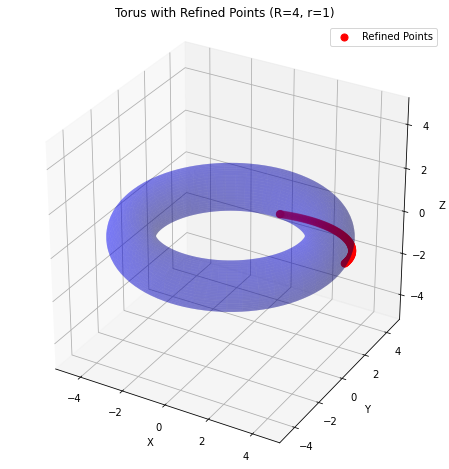

In [9]:
torus = torus_func()
# Sample points in I^2 (initially taken equidistant in the u,v space)
# pts = [(u, v) for u in np.linspace(0, 0.5*np.pi, 10)[:-1] for v in np.linspace(0.5*np.pi, 1*np.pi, 10)[:-1]]
pts = np.c_[np.linspace(0, 0.5*np.pi, 100)[:-1], np.linspace(0*np.pi, -0.5*np.pi, 100)[:-1]]

# Run the Midpoint_Search function for 10 iterations
result_pts = Midpoint_Search(torus, pts, 10)

result_pts

# Plot with default values
plot_torus_with_points_fixed_v2(result_pts)

In [12]:
pts

array([[ 0.0793231 , -0.07945804],
       [ 0.09518773, -0.09534949],
       [ 0.11105237, -0.11124089],
       [ 0.126917  , -0.12713221],
       [ 0.14278164, -0.14302346],
       [ 0.15864628, -0.15891461],
       [ 0.17451092, -0.17480567],
       [ 0.19037556, -0.19069661],
       [ 0.20624021, -0.20658744],
       [ 0.22210486, -0.22247814],
       [ 0.23796951, -0.2383687 ],
       [ 0.25383416, -0.25425911],
       [ 0.26969882, -0.27014936],
       [ 0.28556348, -0.28603945],
       [ 0.30142815, -0.30192936],
       [ 0.31729282, -0.31781909],
       [ 0.33315749, -0.33370862],
       [ 0.34902216, -0.34959796],
       [ 0.36488685, -0.36548708],
       [ 0.38075153, -0.38137598],
       [ 0.39661622, -0.39726465],
       [ 0.41248092, -0.41315308],
       [ 0.42834562, -0.42904125],
       [ 0.44421032, -0.44492915],
       [ 0.46007504, -0.4608168 ],
       [ 0.47593976, -0.4767042 ],
       [ 0.4918045 , -0.49259131],
       [ 0.50766924, -0.50847815],
       [ 0.52353397,

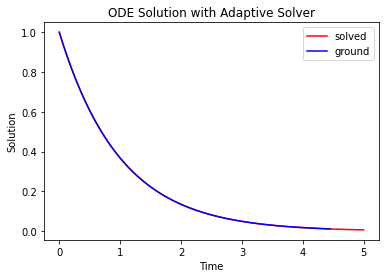

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE as a function
def myODE(y, t):
    return -y

# Initial condition
y0 = 1.0

# Time points at which you want the solution
t = np.linspace(0, 5, 101)
z = np.exp(-t)
# Integrate the ODE using odeint
sol = odeint(myODE, y0, t)

# Plot the solution
plt.plot(t, sol, color='r', label='solved')
plt.plot(t[:90], z[:90], color='b', label='ground')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.title('ODE Solution with Adaptive Solver')
plt.legend() 
plt.show()

In [2]:
import networkx as nx
g1 = nx.Graph()
g1.add_edges_from([(1, 2), (1, 4), (2, 4), (2, 5), (3, 5), (3, 6), (5, 6)])
g2 = nx.Graph()
g2.add_edges_from([(1, 2), (1, 4), (2, 3), (2, 5), (3, 6), (4, 5), (5, 6)])

g1_hash = nx.weisfeiler_lehman_graph_hash(g1)
g2_hash = nx.weisfeiler_lehman_graph_hash(g2)

In [3]:
g1_hash

'15981867526b451292338ffade4ee93e'

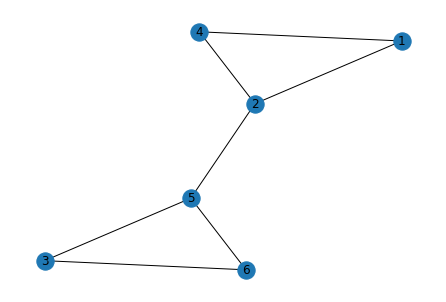

In [4]:
nx.draw(g1,with_labels=True)

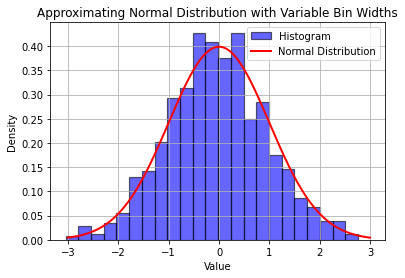

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random normal distribution
np.random.seed(0)
data = np.random.normal(0, 1, 1000)

# Create histogram with variable bin widths
hist, bins = np.histogram(data, bins='auto')

# Plot the histogram
plt.hist(data, bins=bins, density=True, alpha=0.6, color='b', edgecolor='black', linewidth=1.2, label='Histogram')

# Plot the normal distribution as a curve for comparison
x = np.linspace(-3, 3, 1000)
y = 1 / (np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, y, 'r-', linewidth=2, label='Normal Distribution')

# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Approximating Normal Distribution with Variable Bin Widths')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


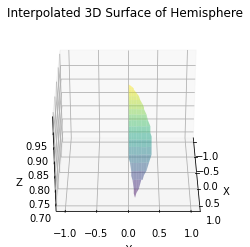

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Generate 2D hemisphere points
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Create 2D array of points for interpolation
points = np.column_stack((x.flatten(), y.flatten(), z.flatten()))

# Sample some points from the hemisphere surface (replace this with your actual data)
num_points = 100
np.random.seed(42)
sampled_points = np.random.rand(num_points, 3)
sampled_points[:, 0] = np.sin(sampled_points[:, 0]) * np.cos(sampled_points[:, 1])
sampled_points[:, 1] = np.sin(sampled_points[:, 0]) * np.sin(sampled_points[:, 1])
sampled_points[:, 2] = np.cos(sampled_points[:, 0])

# Interpolate to create a continuous surface
grid_x, grid_y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
interpolated_z = griddata(sampled_points[:, :2], sampled_points[:, 2], (grid_x, grid_y), method='linear')

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the continuous surface
#ax.scatter(sampled_points[:, 0], sampled_points[:, 1], sampled_points[:, 2], color='red', label='Sampled Points')
ax.plot_surface(grid_x, grid_y, interpolated_z, alpha=0.5, cmap='viridis', label='Interpolated Surface')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Interpolated 3D Surface of Hemisphere')
ax.view_init(elev=30, azim=0)
#plt.legend()
plt.show()


In [6]:
sampled_points[:, :2].shape

(100, 2)

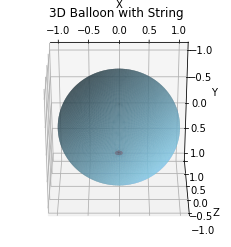

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_balloon_points(radius=1.0, num_points=1000):
    # Create points for the balloon surface
    phi = np.linspace(0, 2 * np.pi, num_points)
    theta = np.linspace(0, np.pi, num_points)
    phi, theta = np.meshgrid(phi, theta)
    x = radius * np.sin(theta) * np.cos(phi)
    y = radius * np.sin(theta) * np.sin(phi)
    z = radius * np.cos(theta)

    # Create points for the string
    string_length = 3.0 * radius
    string_radius = 0.05 * radius
    string_points = np.linspace(0, string_length, num_points)
    string_x = string_radius * np.sin(phi[-1]) * np.cos(theta[-1]) + x[-1]
    string_y = string_radius * np.sin(phi[-1]) * np.sin(theta[-1]) + y[-1]
    string_z = string_radius * np.cos(phi[-1]) + z[-1]

    return x, y, z, string_x, string_y, string_z

def plot_balloon(x, y, z, string_x, string_y, string_z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the balloon surface
    ax.plot_surface(x, y, z, color='skyblue', alpha=0.8, rstride=5, cstride=5)

    # Plot the string
    ax.plot(string_x, string_y, string_z, color='red', linewidth=2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Balloon with String')
    ax.view_init(elev=-60, azim=-90)

    plt.show()

balloon_points = create_balloon_points()
plot_balloon(*balloon_points)


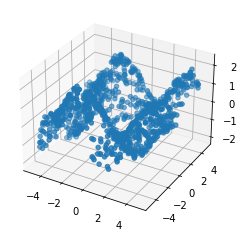

7/7 [==============================] - 0s 1ms/step - loss: 0.0436
Mean Squared Error on Test Set: 0.04358922317624092
32/32 [==============================] - 0s 664us/step


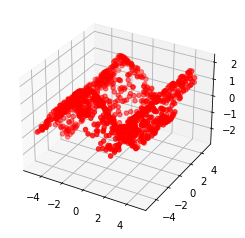

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Generate some sample data
np.random.seed(42)
num_samples = 1000
x = np.random.uniform(low=-5, high=5, size=(num_samples, 2))
y = -np.sin(x[:, 0]) - np.cos(x[:, 1]) + np.random.normal(scale=0.1, size=num_samples)

# Visualize the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, marker='o')
plt.show()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0)

# Evaluate the model on the test set
loss = model.evaluate(x_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Use the trained model to predict flow on a new set of points
new_points = np.random.uniform(low=-5, high=5, size=(1000, 2))
predicted_flow = model.predict(new_points)

# Visualize the predicted flow
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_points[:, 0], new_points[:, 1], predicted_flow, marker='o', color='r', label='Predicted Flow')
plt.show()


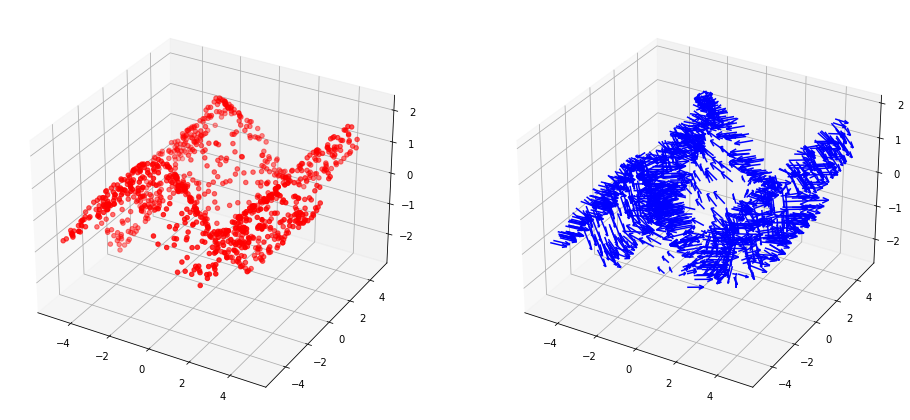

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# ... (Previous code for data generation and model training)

# Function to compute the gradient using the model
def compute_gradient(model, point):
    point = tf.convert_to_tensor([point], dtype=tf.float32)  # Convert to a tf.Tensor
    with tf.GradientTape() as tape:
        tape.watch(point)
        prediction = model(point)
    gradient = tape.gradient(prediction, point)
    return gradient.numpy()[0]

# Example usage to compute gradient at a specific point
sample_point = np.array([1.0, 2.0])
gradient_at_point = compute_gradient(model, sample_point)

# Visualize the predicted flow and gradient
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(new_points[:, 0], new_points[:, 1], predicted_flow, marker='o', color='r', label='Predicted Flow')

# Plotting the gradient arrows
ax = fig.add_subplot(122, projection='3d')
for point in new_points:
    gradient = compute_gradient(model, point)
    ax.quiver(point[0], point[1], model.predict(np.array([point]), verbose=0), gradient[0], gradient[1], -0.1, color='b')


plt.show()


In [23]:
gradient

array([ 0.603372  , -0.71488255], dtype=float32)

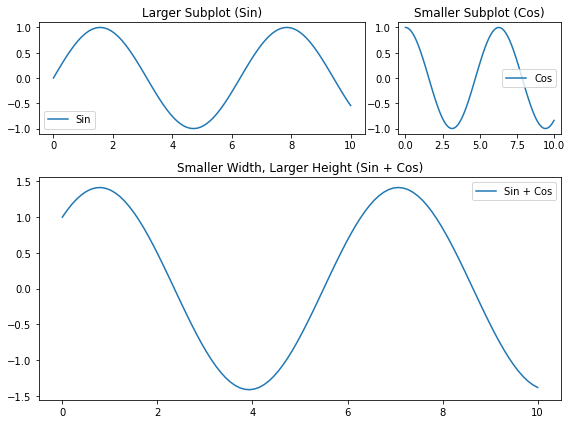

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Generate example data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and a grid of subplots
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 2])

# Create the first subplot (larger in both width and height)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(x, y1, label='Sin')

# Create the second subplot (smaller in both width and height)
ax2 = plt.subplot(gs[0, 1])
ax2.plot(x, y2, label='Cos')

# Create the third subplot (smaller in width, larger in height)
ax3 = plt.subplot(gs[1, :])
ax3.plot(x, y1 + y2, label='Sin + Cos')

# Set titles and labels for each subplot
ax1.set_title('Larger Subplot (Sin)')
ax2.set_title('Smaller Subplot (Cos)')
ax3.set_title('Smaller Width, Larger Height (Sin + Cos)')

# Add legend to each subplot
ax1.legend()
ax2.legend()
ax3.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
